In [79]:
# Step_0 : Install Needed Packages 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta 
import datetime
import statsmodels.api as sm 
from dateutil import relativedelta
%matplotlib inline

In [80]:
# Get the Number of Months Between Two Dates in Python
# Create Two New Dates
start_date = datetime.datetime(2012,10,21)
end_date = datetime.datetime(2022, 10, 21)

In [81]:
# Calculate the Total Number of months between two dates
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
print("Total No. of Months b/w Two Dates: ",num_months," Months")

Total No. of Months b/w Two Dates:  120  Months


In [83]:
# Get the Number of days Between Two Dates in Python
num_days = end_date-start_date
print("Total No. of Days b/w Two Dates: ",num_days," days")

Total No. of Days b/w Two Dates:  3652 days, 0:00:00  days


In [84]:
# Get the Number of days Between Two Dates in Python
difference_year = relativedelta.relativedelta(end_date, start_date)
num_years= difference_year.years
print("Total No. of Years b/w Two Dates: ",num_years," years")

Total No. of Years b/w Two Dates:  10  years


In [85]:
#Risk Free Rate
rfr=0.03   #This depends on the country 

In [86]:
# Download Data for your Stock 
# PLUG POWER company was selected for this case , is a renewable energy company - You can select any stock by choosing the ticker on YAHOO FINANCE
PLUG = yf.download("PLUG",start=start_date, end=end_date)

#Print the head and the tail of you Stock data table
print(PLUG.head())
print(PLUG.tail())

[*********************100%***********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2012-10-22  0.71  0.80  0.70   0.76       0.76   41300
2012-10-23  0.72  0.76  0.67   0.70       0.70   91400
2012-10-24  0.70  0.79  0.70   0.76       0.76  118800
2012-10-25  0.74  0.80  0.73   0.74       0.74  222500
2012-10-26  0.74  0.79  0.74   0.74       0.74   60900
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-10-14  18.240000  19.290001  17.879999  18.030001  18.030001  26492900
2022-10-17  18.590000  19.100000  18.420000  18.620001  18.620001  15412100
2022-10-18  19.600000  19.750000  18.480000  19.110001  19.110001  16435100
2022-10-19  18.930000  18.930000  16.809999  16.950001  16.950001  29147300
2022-10-20  16.969999  16.990000  16.110001  16.330000  16.330000  19323900


In [87]:
#Describe your data with statistical summaries
PLUG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,8.001280,8.275898,7.701236,7.989920,7.989920,1.179345e+07
std,11.853847,12.286673,11.367322,11.838404,11.838404,1.697877e+07
min,0.120000,0.130000,0.120000,0.120000,0.120000,1.640000e+04
25%,1.820000,1.870000,1.760000,1.807500,1.807500,2.259000e+06
50%,2.470000,2.535000,2.400000,2.450000,2.450000,4.938800e+06
75%,5.955000,6.090000,5.715000,5.875000,5.875000,1.606690e+07
max,70.300003,75.489998,67.260002,73.180000,73.180000,2.432721e+08


In [88]:
#Print information about the stock dataframe
PLUG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2012-10-22 to 2022-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [89]:
#Create Daily Return and Daily return percentage
PLUG['daily_return'] = PLUG.Close.pct_change()
PLUG['daily_return%'] = PLUG.Close.pct_change(1).mul(100)
PLUG.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_return%
Date,,,,,,,,
2012-10-22,0.71,0.80,0.70,0.76,0.76,41300,NaN,NaN
2012-10-23,0.72,0.76,0.67,0.70,0.70,91400,-0.078947,-7.894737
2012-10-24,0.70,0.79,0.70,0.76,0.76,118800,0.085714,8.571429
2012-10-25,0.74,0.80,0.73,0.74,0.74,222500,-0.026316,-2.631576
2012-10-26,0.74,0.79,0.74,0.74,0.74,60900,0.000000,0.000000


<AxesSubplot:xlabel='Date'>

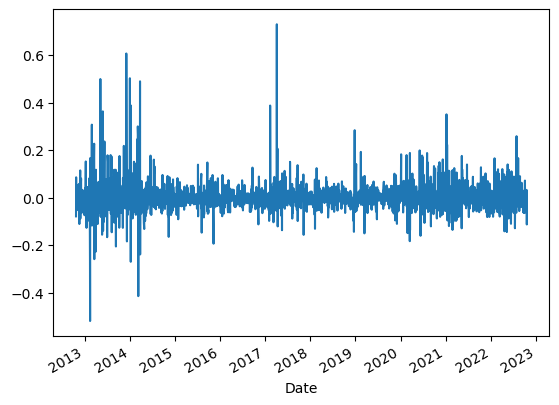

In [91]:
#Plot Daily Return 
PLUG.daily_return.plot()

<AxesSubplot:xlabel='Date'>

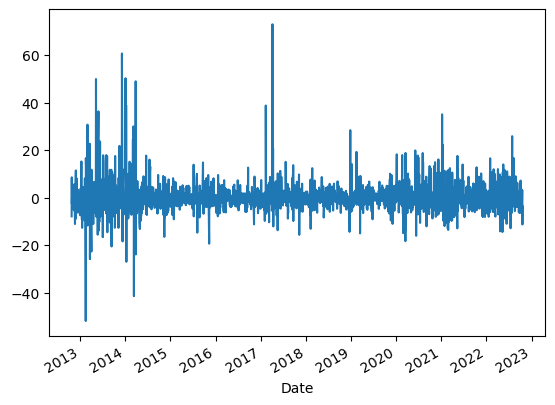

In [92]:
#Plot Daily Return percentage
PLUG['daily_return%'].plot()

In [93]:
#Create monthly_return and monthly_return percentage
PLUG['monthly_return'] = PLUG.Close.pct_change(30)
PLUG['monthly_return%'] = PLUG.Close.pct_change(30).mul(100)
PLUG.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_return%,monthly_return,monthly_return%
Date,,,,,,,,,,
2012-10-22,0.71,0.80,0.70,0.76,0.76,41300,NaN,NaN,NaN,NaN
2012-10-23,0.72,0.76,0.67,0.70,0.70,91400,-0.078947,-7.894737,NaN,NaN
2012-10-24,0.70,0.79,0.70,0.76,0.76,118800,0.085714,8.571429,NaN,NaN
2012-10-25,0.74,0.80,0.73,0.74,0.74,222500,-0.026316,-2.631576,NaN,NaN
2012-10-26,0.74,0.79,0.74,0.74,0.74,60900,0.000000,0.000000,NaN,NaN


In [94]:
#Create annual_return and annual_return percentage
PLUG['annual_return'] = PLUG.Close.pct_change(360)
PLUG['annual_return%'] = PLUG.Close.pct_change(360).mul(100)
PLUG.head()


,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_return%,monthly_return,monthly_return%,annual_return,annual_return%
Date,,,,,,,,,,,,
2012-10-22,0.71,0.80,0.70,0.76,0.76,41300,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-23,0.72,0.76,0.67,0.70,0.70,91400,-0.078947,-7.894737,NaN,NaN,NaN,NaN
2012-10-24,0.70,0.79,0.70,0.76,0.76,118800,0.085714,8.571429,NaN,NaN,NaN,NaN
2012-10-25,0.74,0.80,0.73,0.74,0.74,222500,-0.026316,-2.631576,NaN,NaN,NaN,NaN
2012-10-26,0.74,0.79,0.74,0.74,0.74,60900,0.000000,0.000000,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

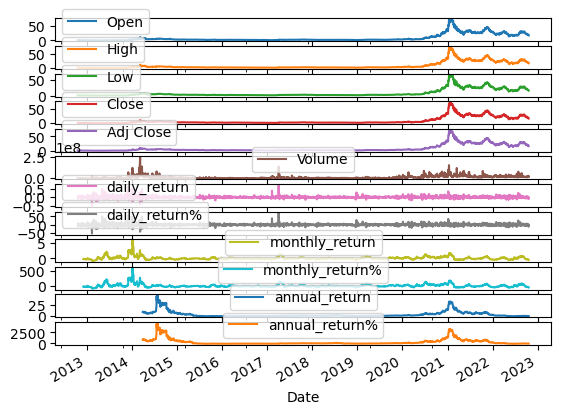

In [95]:
#Plot everything ==> This will show an non -readable plot which will be fixed in the next step
PLUG.plot(subplots=True)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

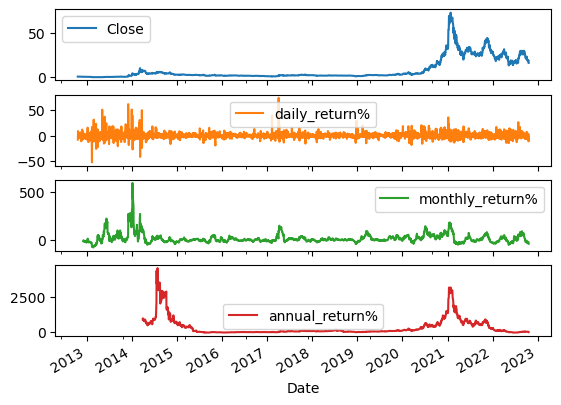

In [96]:
#Plot Different Returns (Daily, Monthly, Yearly) 
PLUG[['Close','daily_return%','monthly_return%','annual_return%']].plot(subplots=True)

In [97]:
#Daily Cumulative Return 
PLUG['daily_cum_ret']=(1+PLUG['daily_return']).cumprod()
PLUG.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_return%,monthly_return,monthly_return%,annual_return,annual_return%,daily_cum_ret
Date,,,,,,,,,,,,,
2012-10-22,0.71,0.80,0.70,0.76,0.76,41300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-23,0.72,0.76,0.67,0.70,0.70,91400,-0.078947,-7.894737,NaN,NaN,NaN,NaN,0.921053
2012-10-24,0.70,0.79,0.70,0.76,0.76,118800,0.085714,8.571429,NaN,NaN,NaN,NaN,1.000000
2012-10-25,0.74,0.80,0.73,0.74,0.74,222500,-0.026316,-2.631576,NaN,NaN,NaN,NaN,0.973684
2012-10-26,0.74,0.79,0.74,0.74,0.74,60900,0.000000,0.000000,NaN,NaN,NaN,NaN,0.973684


<AxesSubplot:title={'center':'daily_cum_ret'}, xlabel='Date'>

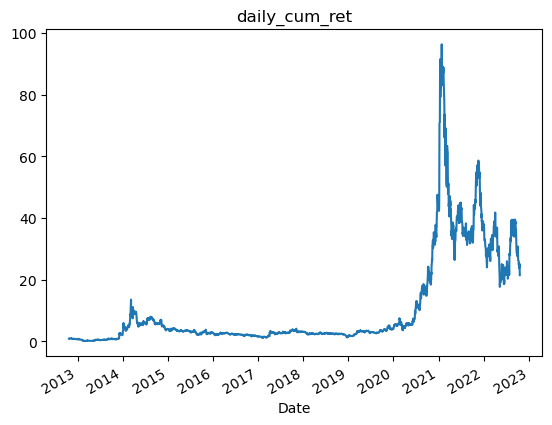

In [98]:
#Plot the Daily Cumulative Return 
PLUG['daily_cum_ret'].plot(title='daily_cum_ret')

In [99]:
# Calculate a standard deviation 
PLUG_std=PLUG['daily_return'].std()
print('The Volatility of the Stock is' ,str(np.round(PLUG_std, 3) * 100) + '%')


The Volatility of the Stock is 6.2%


In [100]:
# ==> Annualized Return 
PLUG.Close.head(1)
PLUG.Close.tail(2)

Date
2022-10-19    16.950001
2022-10-20    16.330000
Name: Close, dtype: float64

In [101]:
# Calculate the total return
total_return_PLUG = (PLUG.Close[-1] - PLUG.Close[0]) /PLUG.Close[0]
print (total_return_PLUG)
print('The Total % Return is ', str(np.round(total_return_PLUG, 4) * 100) + '%')

20.486842274500724
The Total % Return is  2048.68%


In [102]:
# Calculate the annualized returns over months
annualized_return_Months_PLUG= ((1 + total_return_PLUG)**(12/num_months))-1
print (annualized_return_Months_PLUG)
print('The Total Annualized Return per Months  is ', str(np.round(annualized_return_Months_PLUG, 2) * 100) + '%')


0.35899312468287925
The Total Annualized Return per Months  is  36.0%


In [103]:

# Calculate the annualized returns over Years
annualized_return_Years_PLUG= ((1 + total_return_PLUG)**(1/num_years))-1
print (annualized_return_Years_PLUG)
print('The Total Annualized Return per Years  is ', str(np.round(annualized_return_Years_PLUG, 3) * 100) + '%')



0.35899312468287925
The Total Annualized Return per Years  is  35.9%


# @Calculating the Sharpe Ratio

In [104]:
# Calculate the annualized standard deviation
annualized_vol_PLUG = PLUG.daily_return.std()*np.sqrt(250)
print (annualized_vol_PLUG)
print('The Total Annualized Volatility is ', str(np.round(annualized_vol_PLUG, 4) * 100) + '%')

0.9870365513346876
The Total Annualized Volatility is  98.7%


In [105]:
# Define the risk free rate
rfr #Is already defined on the Begigning 
# Calcuate the sharpe ratio
sharpe_ratio = (annualized_return_Years_PLUG - rfr) / annualized_vol_PLUG
print ('The Sharp Ratio', str(np.round(sharpe_ratio, 4)))


The Sharp Ratio 0.3333


In [112]:
# All Results Together
print('--------------------- Summary of Last 10 years analysis of PLUG POWER Stock ----------------------')
print("Total No. of Days b/w Two Dates: ",num_days)
print("Total No. of Months b/w Two Dates: ",num_months)
print("Total No. of Years b/w Two Dates: ",num_years)
print('-----------')
print('The Volatility of the Stock is' ,str(np.round(PLUG_std, 4) * 100) + '%')
print('The Total % Return is ', str(np.round(total_return_PLUG, 4) * 100) + '%')
print('The Total Annualized Return per Months  is ', str(np.round(annualized_return_Months_PLUG, 2) * 100) + '%')
print('The Total Annualized Return per Years  is ', str(np.round(annualized_return_Years_PLUG, 3) * 100) + '%')
print('The Total Annualized Volatility is ', str(np.round(annualized_vol_PLUG, 2) * 100) + '%')
print ('The Sharp Ratio', str(np.round(sharpe_ratio, 4)))

--------------------- Summary of Last 10 years analysis of PLUG POWER Stock ----------------------
Total No. of Days b/w Two Dates:  3652 days, 0:00:00
Total No. of Months b/w Two Dates:  120
Total No. of Years b/w Two Dates:  10
-----------
The Volatility of the Stock is 6.239999999999999%
The Total % Return is  2048.68%
The Total Annualized Return per Months  is  36.0%
The Total Annualized Return per Years  is  35.9%
The Total Annualized Volatility is  99.0%
The Sharp Ratio 0.3333


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

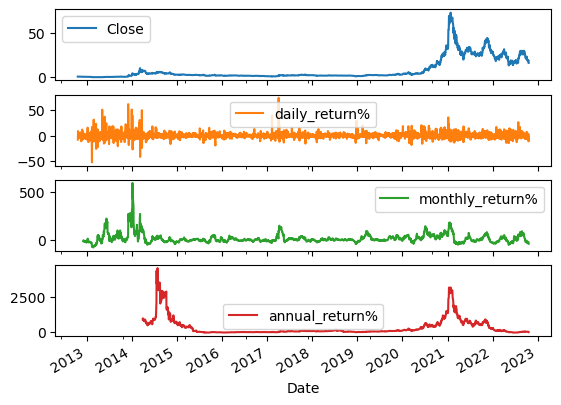

In [107]:
#Ploting key parameters
PLUG[['Close','daily_return%','monthly_return%','annual_return%']].plot(subplots=True)